In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [6]:
dataset = pd.read_csv(r"C:\Users\afrah\Downloads\IBM.csv", index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439


In [7]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

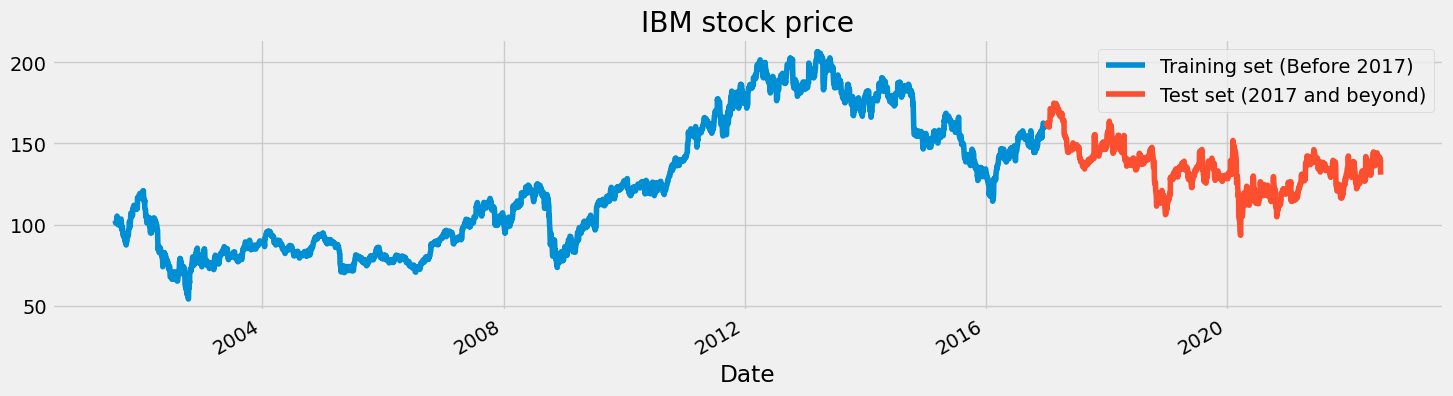

In [8]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

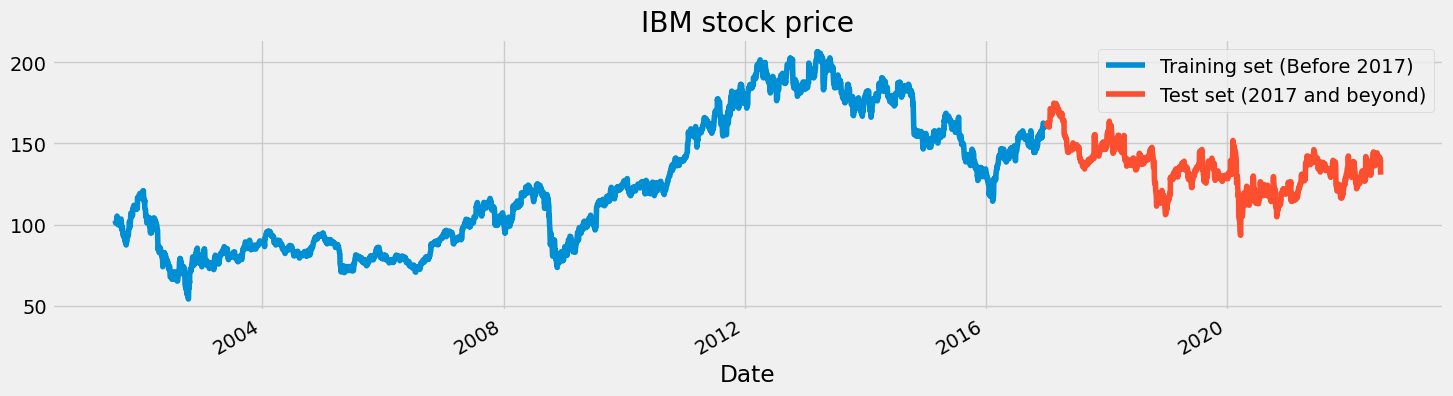

In [9]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [13]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
85/85 [==============================] - 25s 162ms/step - loss: 0.0100
Epoch 2/10
85/85 [==============================] - 11s 133ms/step - loss: 0.0050
Epoch 3/10
85/85 [==============================] - 15s 174ms/step - loss: 0.0042
Epoch 4/10
85/85 [==============================] - 14s 166ms/step - loss: 0.0037
Epoch 5/10
85/85 [==============================] - 13s 151ms/step - loss: 0.0032
Epoch 6/10
85/85 [==============================] - 12s 143ms/step - loss: 0.0029
Epoch 7/10
85/85 [==============================] - 11s 128ms/step - loss: 0.0024
Epoch 8/10
85/85 [==============================] - 16s 187ms/step - loss: 0.0026
Epoch 9/10
85/85 [==============================] - 15s 179ms/step - loss: 0.0024
Epoch 10/10
85/85 [==============================] - 13s 159ms/step - loss: 0.0021


In [14]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [15]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 3s 41ms/step


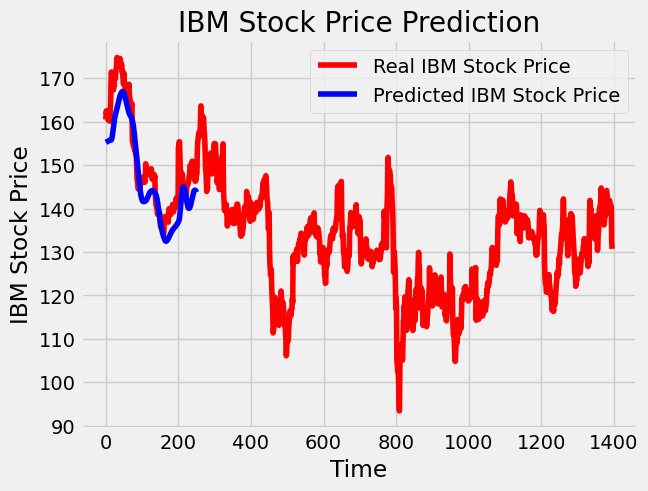

In [16]:
plot_predictions(test_set,predicted_stock_price)

In [17]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

ValueError: Found input variables with inconsistent numbers of samples: [1396, 251]

In [18]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15


C:\Users\afrah\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 24s 598ms/step - loss: 0.0627
Epoch 2/15
19/19 [==============================] - 10s 557ms/step - loss: 0.0256
Epoch 3/15
19/19 [==============================] - 11s 588ms/step - loss: 0.0084
Epoch 4/15
19/19 [==============================] - 10s 541ms/step - loss: 0.0029
Epoch 5/15
19/19 [==============================] - 10s 527ms/step - loss: 0.0023
Epoch 6/15
19/19 [==============================] - 10s 522ms/step - loss: 0.0022
Epoch 7/15
19/19 [==============================] - 10s 530ms/step - loss: 0.0021
Epoch 8/15
19/19 [==============================] - 10s 542ms/step - loss: 0.0020
Epoch 9/15
19/19 [==============================] - 10s 546ms/step - loss: 0.0018
Epoch 10/15
19/19 [==============================] - 12s 627ms/step - loss: 0.0019
Epoch 11/15
19/19 [==============================] - 12s 611ms/step - loss: 0.0017
Epoch 12/15
19/19 [==============================] - 11s 562ms/step - loss: 0.0019
Epoch 13/15
19/19 [=====

In [19]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 [==============================] - 2s 32ms/step


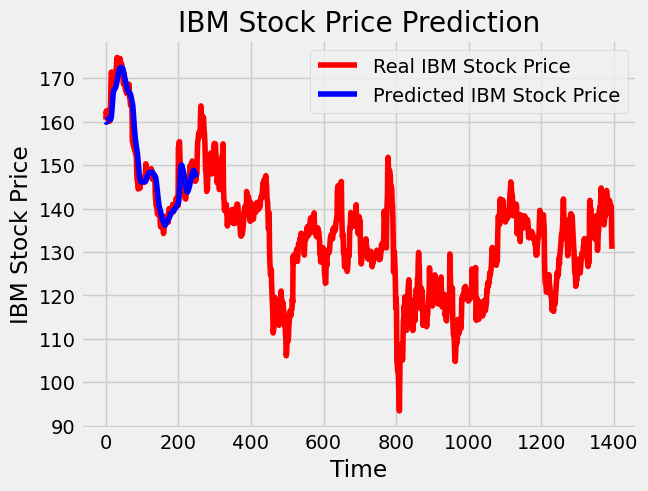

In [20]:
plot_predictions(test_set,GRU_predicted_stock_price)

In [21]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

ValueError: Found input variables with inconsistent numbers of samples: [1396, 251]